In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv('healthcare.csv')
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [65]:
# Verificar se existe valores nulos
df.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [74]:
# df['Medical Condition'].unique()
df['Medical Condition'].value_counts()

Medical Condition
5.0    9308
1.0    9304
9.0    9231
2.0    9227
Name: count, dtype: int64

In [67]:
# Ajustar os dados
df['Gender'] = df['Gender'].map({'Male' : 0, 'Female' : 1})
df['Blood Type'] = df['Blood Type'].map({'A+' : 0, 'A-' : 1, 'B+' : 2, 'B-' : 3, 'AB+' : 4, 'AB-' : 5, 'O+' : 6, 'O-' : 7})
df['Medical Condition'] = df['Medical Condition'].map({'Healthy' : 0, 'Diabetes' : 1, 'Cancer' : 2, 'Heart Disease' : 3, 'Alzheimer' : 4, 'Arthritis' : 5, 'Osteoporosis' : 6, 'Kidney Disease' : 7, 'Stroke' : 8, 'Obesity' : 9})
df['Hospital'] = df['Hospital'].map({'Sons and Miller': 0, 'St. Mary': 1, 'St. Joseph': 2, 'St. John': 3, 'St. Jude': 4, 'St. Francis': 5, 'St. Elizabeth': 6, 'St. Peter': 7, 'St. Luke': 8, 'St. Paul': 9})
df['Admission Type'] = df['Admission Type'].map({'Elective' : 0, 'Emergency' : 1, 'Urgent' : 2, 'Trauma' : 3, 'Normal' : 4})



In [68]:
df.head()
# sns.scatterplot(data=df, x='Billing Amount', y='Medical Condition', hue='Medical Condition')
# plt.show()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,0,3,2.0,2024-01-31,Matthew Smith,0.0,NaN,18856.281306,328,2,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,0,0,9.0,2019-08-20,Samantha Davies,NaN,NaN,33643.327287,265,1,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,1,1,9.0,2022-09-22,Tiffany Mitchell,NaN,0.0,27955.096079,205,1,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,1,6,1.0,2020-11-18,Kevin Wells,NaN,NaN,37909.782410,450,0,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,1,4,2.0,2022-09-19,Kathleen Hanna,NaN,0.0,14238.317814,458,2,2022-10-09,Penicillin,Abnormal


In [72]:
df1 = df.drop(['Name', 'Date of Admission', 'Doctor', 'Hospital', 'Room Number', 'Discharge Date', 'Medication', 'Test Results','Insurance Provider'], axis=1)
df1

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Admission Type
0,30,0,3,2.0,18856.281306,2
1,62,0,0,9.0,33643.327287,1
2,76,1,1,9.0,27955.096079,1
3,28,1,6,1.0,37909.782410,0
4,43,1,4,2.0,14238.317814,2
...,...,...,...,...,...,...
55495,42,1,6,NaN,2650.714952,0
55496,61,1,5,9.0,31457.797307,0
55497,38,1,2,NaN,27620.764717,2
55498,43,0,7,5.0,32451.092358,0


In [88]:


df1.dropna(subset=['Medical Condition'], inplace=True)
df1['Medical Condition'].isna().count()
df1


,Age,Gender,Blood Type,Medical Condition,Billing Amount,Admission Type
0,30,0,3,2.0,18856.281306,2
1,62,0,0,9.0,33643.327287,1
2,76,1,1,9.0,27955.096079,1
3,28,1,6,1.0,37909.782410,0
4,43,1,4,2.0,14238.317814,2
...,...,...,...,...,...,...
55493,57,1,3,5.0,3954.853764,1
55494,67,0,6,5.0,42535.301234,1
55496,61,1,5,9.0,31457.797307,0
55498,43,0,7,5.0,32451.092358,0


<Axes: >

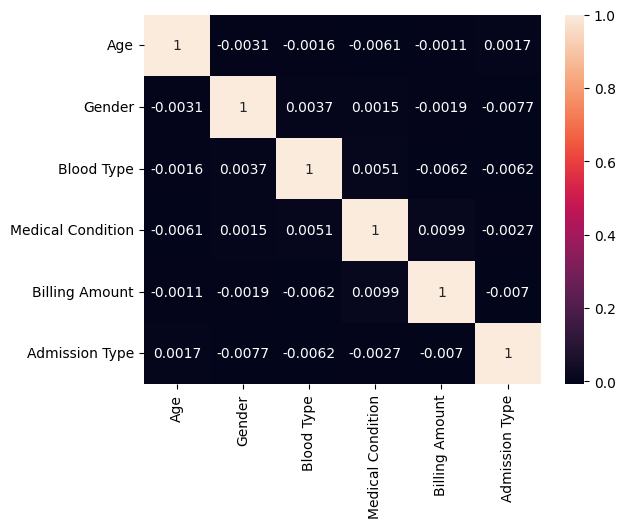

In [89]:
sns.heatmap(df1.corr(), annot=True)

In [91]:
df1

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Admission Type
0,30,0,3,2.0,18856.281306,2
1,62,0,0,9.0,33643.327287,1
2,76,1,1,9.0,27955.096079,1
3,28,1,6,1.0,37909.782410,0
4,43,1,4,2.0,14238.317814,2
...,...,...,...,...,...,...
55493,57,1,3,5.0,3954.853764,1
55494,67,0,6,5.0,42535.301234,1
55496,61,1,5,9.0,31457.797307,0
55498,43,0,7,5.0,32451.092358,0


<Axes: >

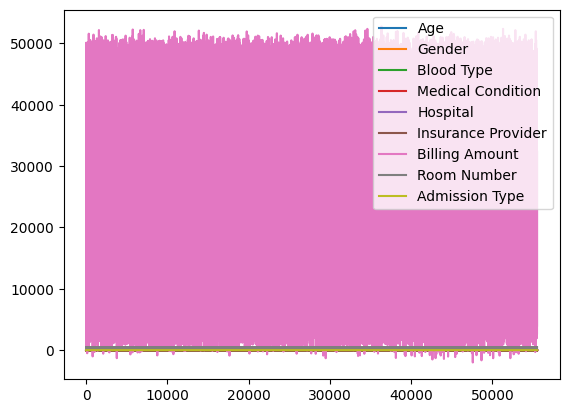

In [90]:
df.plot()

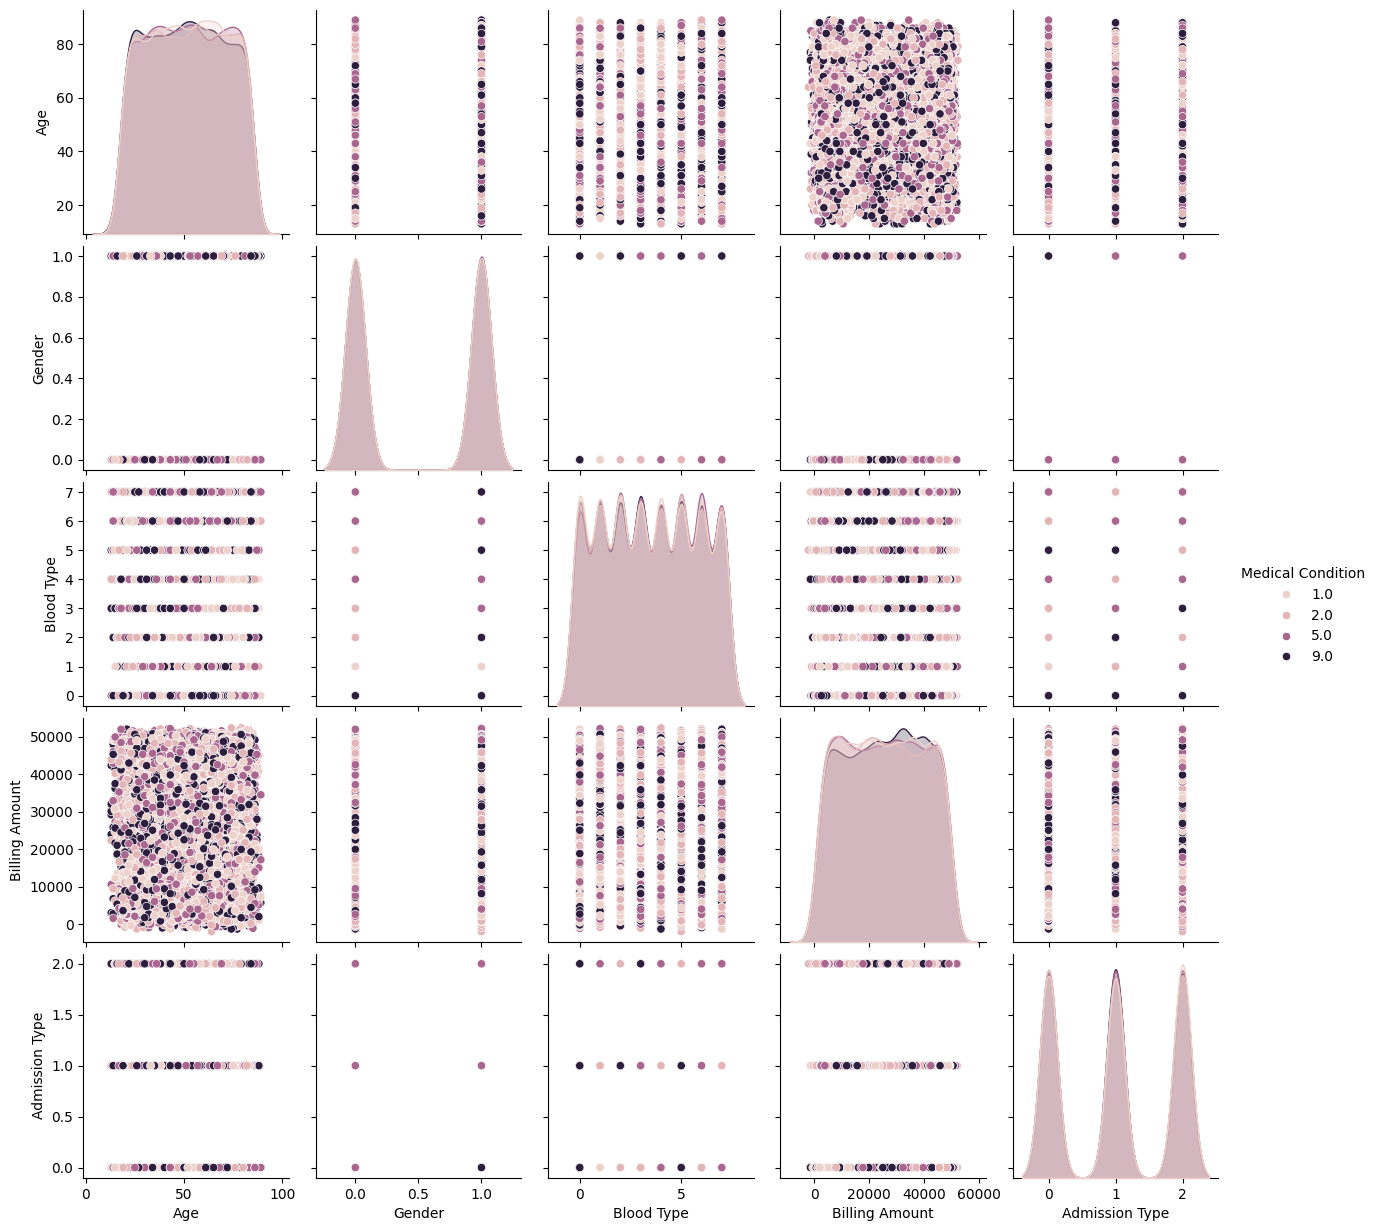

In [92]:
sns.pairplot(df1, hue='Medical Condition')

In [93]:
df1.to_csv('healthcare_clean.csv', index=False)